# Read Data

In [1]:
import pandas as  pd 

In [2]:
df_fruit = pd.read_excel('fruit.xlsx')
df_fruit

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,orange
1,3.91,88.05,166,78,3,orange
2,4.42,95.17,156,81,2,orange
3,4.47,95.60,163,81,4,orange
4,4.48,95.76,161,72,9,orange
...,...,...,...,...,...,...
9995,15.35,253.89,149,77,20,grapefruit
9996,15.41,254.67,148,68,7,grapefruit
9997,15.59,256.50,168,82,20,grapefruit
9998,15.92,260.14,142,72,11,grapefruit


In [3]:
df_fruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [4]:
df_fruit.describe() 

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [5]:
pd.unique(df_fruit['name'])

array(['orange', 'grapefruit'], dtype=object)

In [6]:
df_fruit['name'].value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

## Label Encoder

In [7]:
from sklearn.preprocessing import LabelEncoder as label_encoder
le = label_encoder()
df_fruit['name'] = le.fit_transform(df_fruit['name'])
df_fruit['name'].value_counts()

name
1    5000
0    5000
Name: count, dtype: int64

## Split Atribute

In [8]:
x = df_fruit.drop('name', axis=1)
y = df_fruit['name'] 

## Scalling

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x) 
x = scaler.transform(x) 


## Split Train Test

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Training Model

In [11]:
from sklearn.linear_model import Perceptron
pcp_model = Perceptron()
pcp_model.fit(x_train, y_train)
pcp_model


Perceptron()

## Predict Test

In [12]:
y_pred = pcp_model.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 1, 0])

## Acurate

In [13]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

accuracy = accuracy_score(y_test, y_pred)  
report = classification_report(y_test, y_pred, target_names=le.classes_)
print("Akurasi Model:", accuracy)  
print("\nLaporan Klasifikasi:\n", report)

Akurasi Model: 0.9275

Laporan Klasifikasi:
               precision    recall  f1-score   support

  grapefruit       0.93      0.93      0.93      1012
      orange       0.93      0.93      0.93       988

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



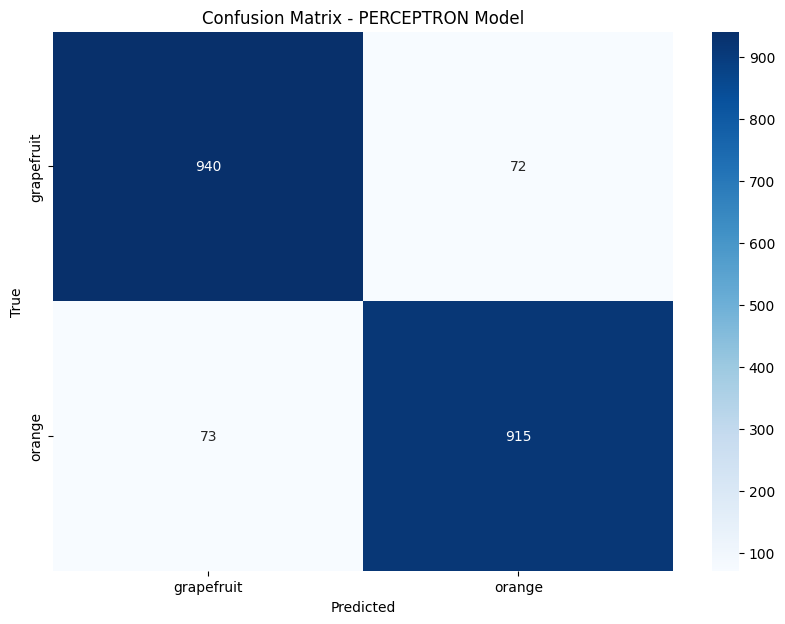

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

pcp_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(pcp_cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - PERCEPTRON Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

/tmp/ipykernel_7421/3548483065.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=le.classes_, y=pcp_cm.diagonal(), palette="viridis")


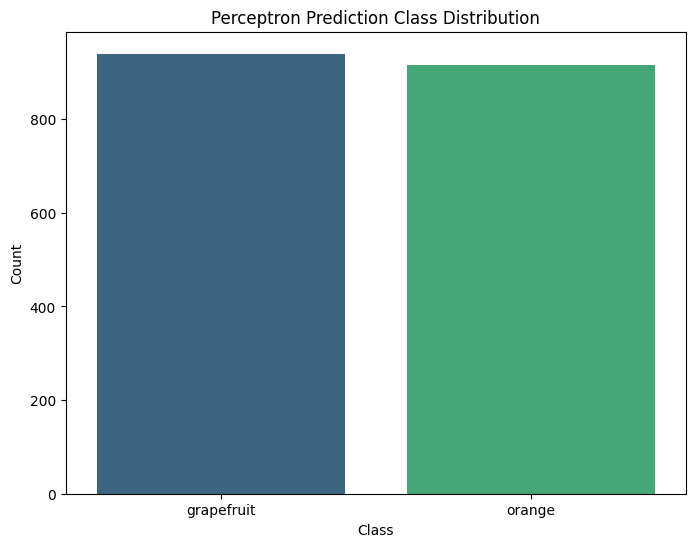

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x=le.classes_, y=pcp_cm.diagonal(), palette="viridis")
plt.title("Perceptron Prediction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## New Data

In [16]:
new_data = pd.DataFrame({
    'diameter': [2.96, 4.42],  
    'weight': [86.76, 95.17],  
    'red': [172, 156],         
    'green': [85, 81],        
    'blue': [2, 2]            
})
new_predictions = pcp_model.predict(new_data)  
new_name = le.inverse_transform(new_predictions)  

for i, name in enumerate(new_name):
    print(f"Data baru {i+1}: Prediksi Nama = {name}")

Data baru 1: Prediksi Nama = orange
Data baru 2: Prediksi Nama = orange


/home/nasssdragon/anaconda3/envs/Python/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but Perceptron was fitted without feature names
  warnings.warn(


### dump

In [17]:
import pickle

with open('model_pcp_fruit.pkl', 'wb') as file:
    pickle.dump(pcp_model, file)

with open('label_encoder_fruit.pkl', 'wb') as file:
    pickle.dump(le, file)
